In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.io import loadmat

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [7]:
# load data
data=loadmat('data/ex8data1.mat')
print(data.keys())
X,Xval,yval=data['X'],data['Xval'],data['yval']
print(np.shape(X))

dict_keys(['__version__', '__globals__', 'X', '__header__', 'Xval', 'yval'])
(307, 2)


In [25]:
# Gaussian parameter estimation
def estimateGaussian(X):
    m=X.shape[0]
    miu=np.mean(X,0)
    sigma=np.sqrt(np.square(np.std(X,0))*(m-1.0)/m)
    return(miu,sigma)
miu,sigma=estimateGaussian(X)
print(miu)
print(sigma)

[ 14.11222578  14.99771051]
[ 1.35154058  1.30544097]


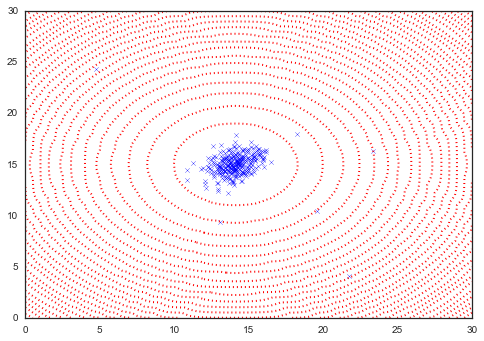

In [86]:
# plot a probability figure
from scipy.stats import norm
plt.scatter(X[:,0],X[:,1],marker='x',c='b');
plt.gca().axis([0,30,0,30]);

# calculate probability
def calculateGaussian(miu,sigma,x):
    return(np.prod([norm.pdf(ix,imiu,isigma) for ix,imiu,isigma in zip(x,miu,sigma)]))

# draw contours for probability
x1,x2=np.meshgrid(np.linspace(0,30,61),np.linspace(0,30,61))
pgrid=np.empty(np.shape(x1.ravel()))
for i,ix in enumerate(np.c_[x1.ravel(),x2.ravel()]):
    pgrid[i]=calculateGaussian(miu,sigma,ix)
pgrid=pgrid.reshape(np.shape(x1))
c_level=np.exp(np.linspace(np.log(np.min(pgrid)),np.log(np.max(pgrid)),30))
plt.contour(x1, x2, pgrid, levels=c_level,linewidths=2, colors='red', linestyles='dotted');

In [73]:
# select threshold based on valuation dataset
def calculateFscore(pval,yval,epsilon):
    ypre=(pval <= epsilon).astype(int)
    tp=0
    fp=0
    fn=0
    for i,ypre_i in enumerate(ypre):
        if ypre_i == 1:
            if yval[i] == 1:
                tp+=1
            else:
                fp+=1
        else:
            if yval[i] == 1:
                fn+=1
    prec=float(tp)/float(tp+fp)
    rec=float(tp)/float(tp+fn)
    f1=2.0*prec*rec/(prec+rec)
    return(f1)
def selectThreshold(Xval,yval,miu,sigma):
    pval=[calculateGaussian(miu,sigma,xval) for xval in Xval]
    max_f1=0
    for eps_cand in np.linspace(min(pval),max(pval),1000):
        f1=calculateFscore(pval,yval,eps_cand)
        if f1 > max_f1:
            eps_sel=eps_cand
            max_f1=f1
    return(eps_sel)
epi_sel=selectThreshold(Xval,yval,miu,sigma)
print(epi_sel)

9.02926283004e-05


In [74]:
# anomaly identification
def anomalyIdentify(p,epi):
    return(p <= epi)
p = [calculateGaussian(miu,sigma,x) for x in X]
ypre = anomalyIdentify(p,epi_sel)


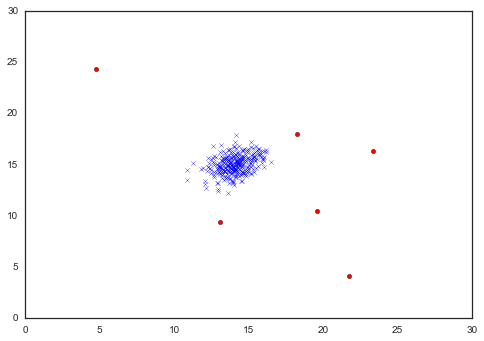

In [78]:
# plot anamoly with red circles
plt.scatter(X[ypre==0,0],X[ypre==0,1],marker='x',c='b');
plt.scatter(X[ypre==1,0],X[ypre==1,1],marker='o',c='r');
plt.gca().axis([0,30,0,30]);